In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [3]:
# Bilstm-partial-crf result 
bilstm_partial_file='data/bilstm-partial-crf.csv'
bilstm_data=pd.read_csv(bilstm_partial_file)
bilstm_data.rename(columns={'removal_method':'entity_removal_method','removal_rate':'entity_removal_rate'},inplace=True)
bilstm_data['number_of_surfaceforms']=0 
bilstm_data.loc[bilstm_data['entity_name']=='Disease','number_of_surfaceforms']=4238
bilstm_data.loc[bilstm_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
bilstm_data.loc[bilstm_data['entity_name']=='Species','number_of_surfaceforms']=1567
bilstm_data.loc[bilstm_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
bilstm_data.loc[bilstm_data['entity_name']=='Gene','number_of_surfaceforms']=28109
bilstm_data['number_of_entity_annotations_after_removal']=bilstm_data['number_of_annotations']-bilstm_data['number_of_removal_annotations'] 
bilstm_data['number_of_surfaceforms_after_removal']=bilstm_data['number_of_surfaceforms']-bilstm_data['number_of_removal_surfaceforms'] 

bilstm_data=bilstm_data[bilstm_data['entity_removal_rate']!=0.0][['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_f1']]
bilstm_data['Model']='BiLSTM-Partial-CRF' 

In [4]:
# pubemedbert-partial result
file_name=r'data/pubmedbert-partial.csv'
pubmedbert_data=pd.read_csv(file_name)
pubmedbert_data['number_of_surfaceforms']=0 # 初始化
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Disease','number_of_surfaceforms']=4238
pubmedbert_data.loc[pubmedbert_data['entity_name']=='CellLine','number_of_surfaceforms']=1419
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Species','number_of_surfaceforms']=1567
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Chemical','number_of_surfaceforms']=29908
pubmedbert_data.loc[pubmedbert_data['entity_name']=='Gene','number_of_surfaceforms']=28109
pubmedbert_data['number_of_entity_annotations_after_removal']=pubmedbert_data['number_of_annotations']-pubmedbert_data['number_of_removal_annotations'] 
pubmedbert_data['number_of_surfaceforms_after_removal']=pubmedbert_data['number_of_surfaceforms']-pubmedbert_data['number_of_removal_surfaceforms'] 
pubmedbert_data=pubmedbert_data[['entity_name','entity_removal_method', 'entity_removal_rate','number_of_annotations','number_of_surfaceforms','number_of_entity_annotations_after_removal','number_of_surfaceforms_after_removal','test_f1']]
pubmedbert_data['Model']='PubMedBERT'

In [5]:
# partial-eer
file_name=r'data/partial-eer.csv'
eer_data=pd.read_csv(file_name)
# 用到的列：test/test_f1-measure-overall,dataset_reader.removal_algorithm, train_data_path,dataset_reader.removal_rate,要进行统一
eer_data['train_data_path']=eer_data['train_data_path'].str.split('/').str.get(1)
eer_data.rename(columns={'train_data_path':'entity_name','dataset_reader.removal_algorithm':'entity_removal_method','dataset_reader.removal_rate':'entity_removal_rate',"test/test_f1-measure-overall":"test_f1"},inplace=True)
eer_data=eer_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_f1']]
eer_data['Model']='EER-PubMedBERT'

In [6]:
# My model result
# file_name=r'data/bond-partial-crf.csv'
# mymodel_data1=pd.read_csv(file_name)
# file_name=r'data/bond-partial-crf-2.csv'
# mymodel_data2=pd.read_csv(file_name)
# mymodel_data=pd.concat([mymodel_data1,mymodel_data2],axis=0)
file_name=r'data/gene_chemical_cellline_species.csv'
mymodel_data1=pd.read_csv(file_name)
file_name=r'data/disease_7.csv'
mymodel_data2=pd.read_csv(file_name)

mymodel_data=pd.concat([mymodel_data1,mymodel_data2],axis=0)

In [7]:
mymodel_data.columns

Index(['Name', 'test_f1', 'entity_name', 'entity_removal_method',
       'entity_removal_rate', 'entity_ratio', 'self_training_begin_step',
       'seed', 'prior_loss_weight', 'overall_eer_weight',
       ...
       'training/_tags/I-CellLine_recall', 'training/_tags/L-CellLine_f1',
       'training/_tags/L-CellLine_precision',
       'training/_tags/L-CellLine_recall', 'training/_tags/U-CellLine_f1',
       'training/_tags/U-CellLine_precision',
       'training/_tags/U-CellLine_recall', 'training/f1-measure-CellLine',
       'training/precision-CellLine', 'training/recall-CellLine'],
      dtype='object', length=220)

In [8]:
groups=mymodel_data.groupby(['entity_name','entity_removal_method'])
for group in groups:
    print(group[0])
    print(group[1].shape)

('CellLine', 'remove_annotations_randomly')
(45, 220)
('CellLine', 'remove_surfaceforms_randomly')
(45, 220)
('Chemical', 'remove_annotations_randomly')
(45, 220)
('Chemical', 'remove_surfaceforms_randomly')
(45, 220)
('Disease', 'remove_annotations_randomly')
(45, 220)
('Disease', 'remove_surfaceforms_randomly')
(45, 220)
('Gene', 'remove_annotations_randomly')
(45, 220)
('Gene', 'remove_surfaceforms_randomly')
(45, 220)
('Species', 'remove_annotations_randomly')
(45, 220)
('Species', 'remove_surfaceforms_randomly')
(45, 220)


In [9]:
mymodel_data.head()

,Name,test_f1,entity_name,entity_removal_method,entity_removal_rate,entity_ratio,self_training_begin_step,seed,prior_loss_weight,overall_eer_weight,...,training/_tags/I-CellLine_recall,training/_tags/L-CellLine_f1,training/_tags/L-CellLine_precision,training/_tags/L-CellLine_recall,training/_tags/U-CellLine_f1,training/_tags/U-CellLine_precision,training/_tags/U-CellLine_recall,training/f1-measure-CellLine,training/precision-CellLine,training/recall-CellLine
0,balmy-pyramid-556,0.846079,Chemical,remove_annotations_randomly,0.1,0.01,500,0,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stellar-hill-592,0.834712,Chemical,remove_surfaceforms_randomly,0.1,0.01,500,20,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,frosty-lion-583,0.834697,Chemical,remove_surfaceforms_randomly,0.1,0.01,500,10,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,major-eon-576,0.825672,Chemical,remove_annotations_randomly,0.1,0.01,500,10,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,true-monkey-564,0.824221,Chemical,remove_surfaceforms_randomly,0.1,0.01,500,0,10,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:


# 用到的列：test/test_precision-measure-overall,dataset_reader.removal_algorithm, train_data_path,dataset_reader.removal_rate,要进行统一
mymodel_data=mymodel_data[['entity_name','entity_removal_method', 'entity_removal_rate','test_f1']]
mymodel_data['Model']='TS-PubMedBERT-Partial-CRF'

/var/folders/wk/h6b75djs4kj7t3wc4yxz9llm0000gn/T/ipykernel_8361/3772275604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mymodel_data['Model']='TS-PubMedBERT-Partial-CRF'


In [11]:
mymodel_data.head()['entity_name'].value_counts()

Chemical    5
Name: entity_name, dtype: int64

In [12]:
mymodel_data.entity_name.unique()

array(['Chemical', 'CellLine', 'Species', 'Gene', 'Disease'], dtype=object)

In [13]:
mymodel_data.columns

Index(['entity_name', 'entity_removal_method', 'entity_removal_rate',
       'test_f1', 'Model'],
      dtype='object')

In [14]:
# Bilstm-partial-crf  and pubemedbert-partial result combination
all_baselines=pd.concat([bilstm_data,pubmedbert_data,eer_data,mymodel_data],ignore_index=True)
all_baselines.loc[all_baselines[all_baselines['entity_removal_method']=='remove_annotation_ranomly'].index,'entity_removal_method']='remove_annotations_randomly' # 把remove_annotation_ranomly更改为remove_annotations_randomly

In [15]:
# upperbond file process
upperbond_file='data/pubmedbert-upperbond.csv'
upperbond=pd.read_csv(upperbond_file)

In [16]:
# Dataset info
bilstm_data.head()
bilstm_data.info()
pubmedbert_data.head()
pubmedbert_data.info()
all_baselines.head()
all_baselines.info()
all_baselines['entity_removal_method'].value_counts()
upperbond.head()
upperbond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 35 to 484
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity_name                                 450 non-null    object 
 1   entity_removal_method                       450 non-null    object 
 2   entity_removal_rate                         450 non-null    float64
 3   number_of_annotations                       450 non-null    int64  
 4   number_of_surfaceforms                      450 non-null    int64  
 5   number_of_entity_annotations_after_removal  450 non-null    int64  
 6   number_of_surfaceforms_after_removal        450 non-null    int64  
 7   test_f1                                     450 non-null    float64
 8   Model                                       450 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 35.2+ KB
<class 'pandas.core.frame.Dat

In [17]:
all_baselines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   entity_name                                 1800 non-null   object 
 1   entity_removal_method                       1800 non-null   object 
 2   entity_removal_rate                         1800 non-null   float64
 3   number_of_annotations                       900 non-null    float64
 4   number_of_surfaceforms                      900 non-null    float64
 5   number_of_entity_annotations_after_removal  900 non-null    float64
 6   number_of_surfaceforms_after_removal        900 non-null    float64
 7   test_f1                                     1800 non-null   float64
 8   Model                                       1800 non-null   object 
dtypes: float64(6), object(3)
memory usage: 126.7+ KB


In [18]:
all_baselines_max=all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model'],as_index=False).max()
all_baselines_max

,entity_name,entity_removal_method,entity_removal_rate,Model,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_f1
0,CellLine,remove_annotations_randomly,0.1,BiLSTM-Partial-CRF,2500.0,1419.0,2250.0,1227.0,0.651347
1,CellLine,remove_annotations_randomly,0.1,EER-PubMedBERT,NaN,NaN,NaN,NaN,0.651941
2,CellLine,remove_annotations_randomly,0.1,PubMedBERT,2500.0,1419.0,2250.0,1225.0,0.699278
3,CellLine,remove_annotations_randomly,0.1,TS-PubMedBERT-Partial-CRF,NaN,NaN,NaN,NaN,0.697962
4,CellLine,remove_annotations_randomly,0.2,BiLSTM-Partial-CRF,2500.0,1419.0,2000.0,1061.0,0.639618
...,...,...,...,...,...,...,...,...,...
355,Species,remove_surfaceforms_randomly,0.8,TS-PubMedBERT-Partial-CRF,NaN,NaN,NaN,NaN,0.654456
356,Species,remove_surfaceforms_randomly,0.9,BiLSTM-Partial-CRF,5290.0,1567.0,577.0,508.0,0.272603
357,Species,remove_surfaceforms_randomly,0.9,EER-PubMedBERT,NaN,NaN,NaN,NaN,0.564489
358,Species,remove_surfaceforms_randomly,0.9,PubMedBERT,5290.0,1567.0,577.0,499.0,0.215505


In [19]:
# set entity type 
Entity_Category_list=['Disease','CellLine','Species','Chemical','Gene']
entity_removal_algorithm_list=['remove_annotations_randomly','remove_surfaceforms_randomly']
removal_algorithm_map={"remove_surfaceforms_randomly":'RSFR',"remove_annotations_randomly":"RAR"}
entity_type_map={"Disease":'Diseases','CellLine':'Cell Lines','Species':'Species','Chemical':'Chemicals','Gene':'Genes'}

# 'Chemical','Species'

In [20]:
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
len(category_algorithm_combination)

10

In [21]:
all_baselines['Model'].unique()

array(['BiLSTM-Partial-CRF', 'PubMedBERT', 'EER-PubMedBERT',
       'TS-PubMedBERT-Partial-CRF'], dtype=object)

In [22]:
all_baselines.columns

Index(['entity_name', 'entity_removal_method', 'entity_removal_rate',
       'number_of_annotations', 'number_of_surfaceforms',
       'number_of_entity_annotations_after_removal',
       'number_of_surfaceforms_after_removal', 'test_f1', 'Model'],
      dtype='object')

In [23]:
f1_result=all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model']).agg(["mean",lambda x:x.mean()+1.96*x.sem(),lambda x:x.mean()-1.96*x.sem()])['test_f1']

In [24]:
f1_result.columns=["mean",'ci95_hi','ci95_low']

In [25]:
f1_result.head()

mean  \
entity_name entity_removal_method       entity_removal_rate Model                                 
CellLine    remove_annotations_randomly 0.1                 BiLSTM-Partial-CRF         0.640810   
                                                            EER-PubMedBERT             0.633198   
                                                            PubMedBERT                 0.691471   
                                                            TS-PubMedBERT-Partial-CRF  0.601308   
                                        0.2                 BiLSTM-Partial-CRF         0.623558   

                                                                                        ci95_hi  \
entity_name entity_removal_method       entity_removal_rate Model                                 
CellLine    remove_annotations_randomly 0.1                 BiLSTM-Partial-CRF         0.652005   
                                                            EER-PubMedBERT             0.644916   
                                                            PubMedBERT                 0.699920   
                                                            TS-PubMedBERT-Partial-CRF  0.683408   
                                        0.2                 BiLSTM-Partial-CRF         0.632267   

                                                                                       ci95_low  
entity_name entity_removal_method       entity_removal_rate Model                                
CellLine    remove_annotations_randomly 0.1                 BiLSTM-Partial-CRF         0.629614  
                                                            EER-PubMedBERT             0.621479  
                                                            PubMedBERT                 0.683022  
                                                            TS-PubMedBERT-Partial-CRF  0.519207  
                                        0.2                 BiLSTM-Partial-CRF         0.614848

In [26]:
all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model']).mean()['test_f1'].to_csv('results/model_test_f1.csv')

In [27]:
all_baselines.groupby(by=['entity_name','entity_removal_rate','Model']).mean()['test_f1'].to_csv('results/model_test_f1_for_removal_rate.csv')

In [28]:
all_baselines.groupby(by=['entity_name','entity_removal_method','Model']).mean()['test_f1'].to_csv('results/model_test_f1_for_removal_method.csv')

In [29]:
all_baselines.groupby(by=['entity_name','entity_removal_rate','entity_removal_method']).mean()['number_of_entity_annotations_after_removal'].to_csv('results/num_of_entity_annotations.csv')

In [30]:
all_baselines.groupby(by=['entity_name','Model']).mean()['test_f1'].to_csv('results/model_f1_average.csv')

In [31]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

In [32]:
all_baselines['entity_name'].unique()

array(['Gene', 'CellLine', 'Chemical', 'Species', 'Disease'], dtype=object)

In [33]:
entity_type={"Gene":"Genes","CellLine":"Cell Lines","Chemical":"Chemicals","Species":"Species","Disease":"Diseases"}

current dataset is Gene
current dataset is CellLine
current dataset is Chemical
current dataset is Species
current dataset is Disease


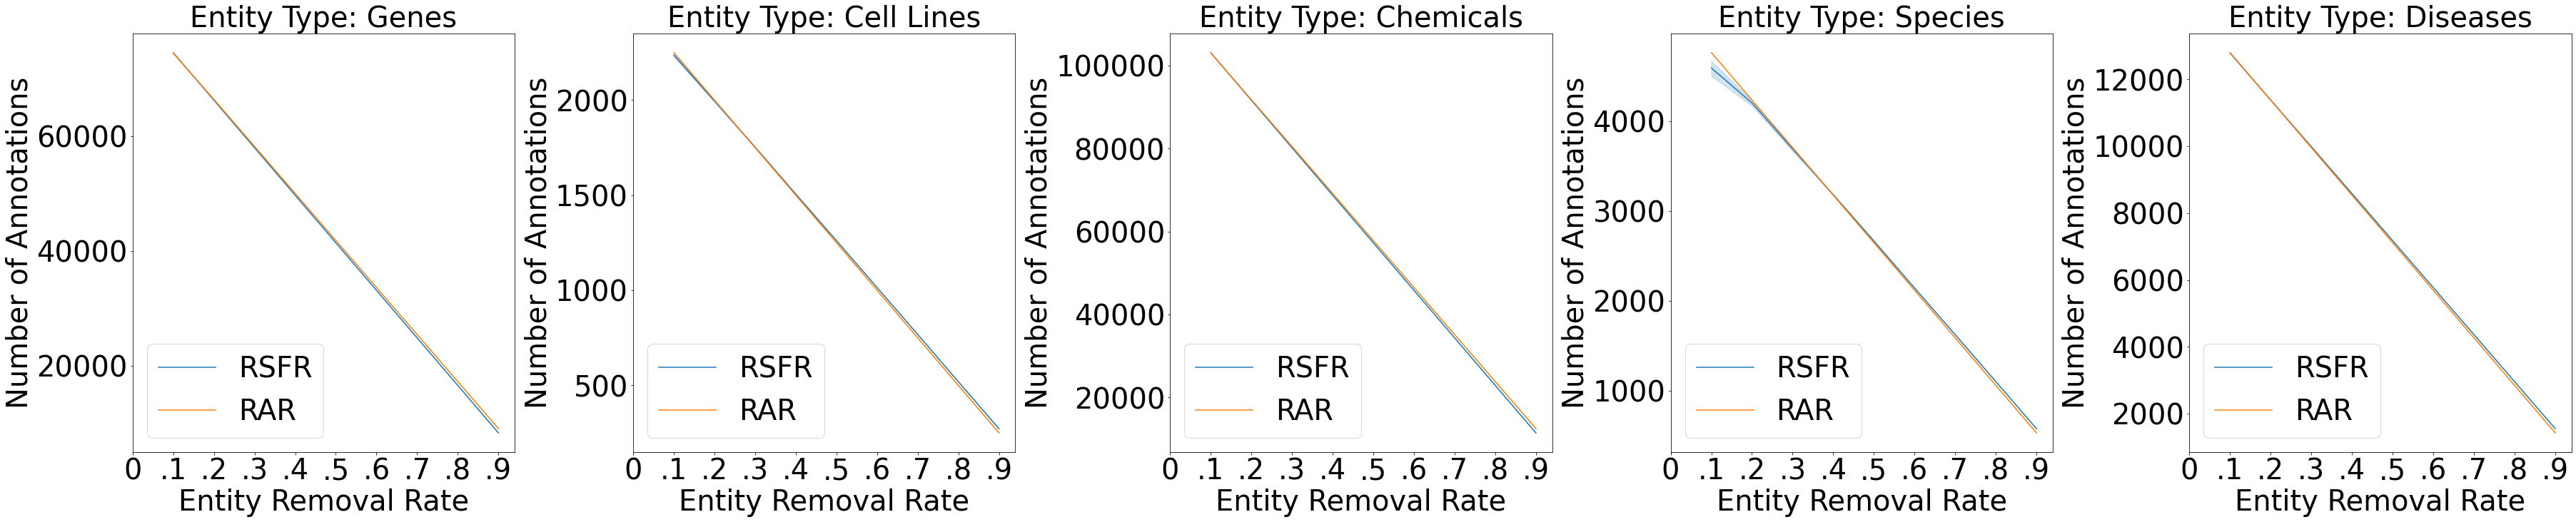

In [34]:
# 对number of annotations进行绘制
# 创建子图，1行5列，每列为dataset，
fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(50,10),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
flag=np.arange(1,6)
for index,ax,dataset in zip(flag,axs.flat,all_baselines['entity_name'].unique()):
        print(f'current dataset is {dataset}')
        seaborn.lineplot(ax=ax,data=all_baselines[all_baselines['entity_name']==dataset],markers=True,dashes=False,x='entity_removal_rate',y='number_of_entity_annotations_after_removal',hue='entity_removal_method',err_style='band')
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(loc='lower left',fontsize=40,labels=['RSFR','RAR'])
        ax.set_xlabel('Entity Removal Rate',fontsize=40)
        # if index==1:
        ax.set_ylabel('Number of Annotations',fontsize=40)
        # else:
        #         ax.get_yaxis().set_visible(False)
        ax.set_xticks(np.arange(0,1.0,0.1))
        ax.set_xticklabels(['0','.1','.2','.3','.4','.5','.6','.7','.8','.9'])
        # ax.set_xticklabels(labels=x_ticklabels)
        ax.tick_params(axis='x',labelsize=40)
        ax.tick_params(axis='y',labelsize=40)
        ax.set_title(f'Entity Type: {entity_type[dataset]}',fontsize=40)

plt.savefig(f"figures/number_of_annotations.pdf",dpi=1000)

In [35]:
ax.get_legend_handles_labels()[1]

['remove_surfaceforms_randomly', 'remove_annotations_randomly']

In [36]:
def ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,dataframe):
    entity_upper=max(upperbond[upperbond['entity_name']==Entity_Category].test_f1)
    cur_data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm) &(dataframe['entity_name']==Entity_Category)]
    seaborn.lineplot(ax=ax,data=cur_data,style="Model",markers=True,dashes=False,x='entity_removal_rate',y='test_f1',hue='Model',err_style='band',hue_order=all_baselines['Model'].unique())
    # # number of entity annotations, and number of entity surface forms
    # # 方法二：通过groupby
    # groups=cur_data.groupby(["entity_removal_rate"]).mean()
    # all_removal_rates=cur_data['entity_removal_rate'].unique().tolist()
    # all_number_annotation_list=[round(k) for k in groups['number_of_entity_annotations_after_removal'].tolist()]
    # all_number_surfaceforms_list=[round(k) for k in groups['number_of_surfaceforms_after_removal'].tolist()]
    # # 添加等于0的位置
    # all_removal_rates.insert(0,0.0)
    # all_number_annotation_list.insert(0,cur_data['number_of_annotations'].iloc[0])
    # all_number_surfaceforms_list.insert(0,cur_data['number_of_surfaceforms'].iloc[0])
    # x_ticklabels=['\n'.join([str(kk[0]),str(kk[1])]) for kk in list(zip(all_removal_rates,all_number_annotation_list,all_number_surfaceforms_list))]

    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]
    # 添加水平横线
    ax.axhline(y=entity_upper,color='red',ls='--',lw=2.5)
    ax.legend(loc='lower left',fontsize=20)
    ax.set_xlabel('Entity Removal Rate',fontsize=20)
    ax.set_ylabel('F1 Score',fontsize=20)
    ax.set_xticks(np.arange(0,1.0,0.1))
    ax.set_yticks(np.arange(0,1.1,0.1))
    # ax.set_xticklabels(labels=x_ticklabels)
    ax.tick_params(axis='x',labelsize=15)
    ax.tick_params(axis='y',labelsize=20)
    ax.set_title(f'Entity Type: {entity_type_map[Entity_Category]}; Entity Removal Scheme: {abbr_algorithm}',fontsize=20)
    # plt.savefig(f"figures/{Entity_Category}_{entity_removal_algorithm}.png")
    # plt.show()

current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

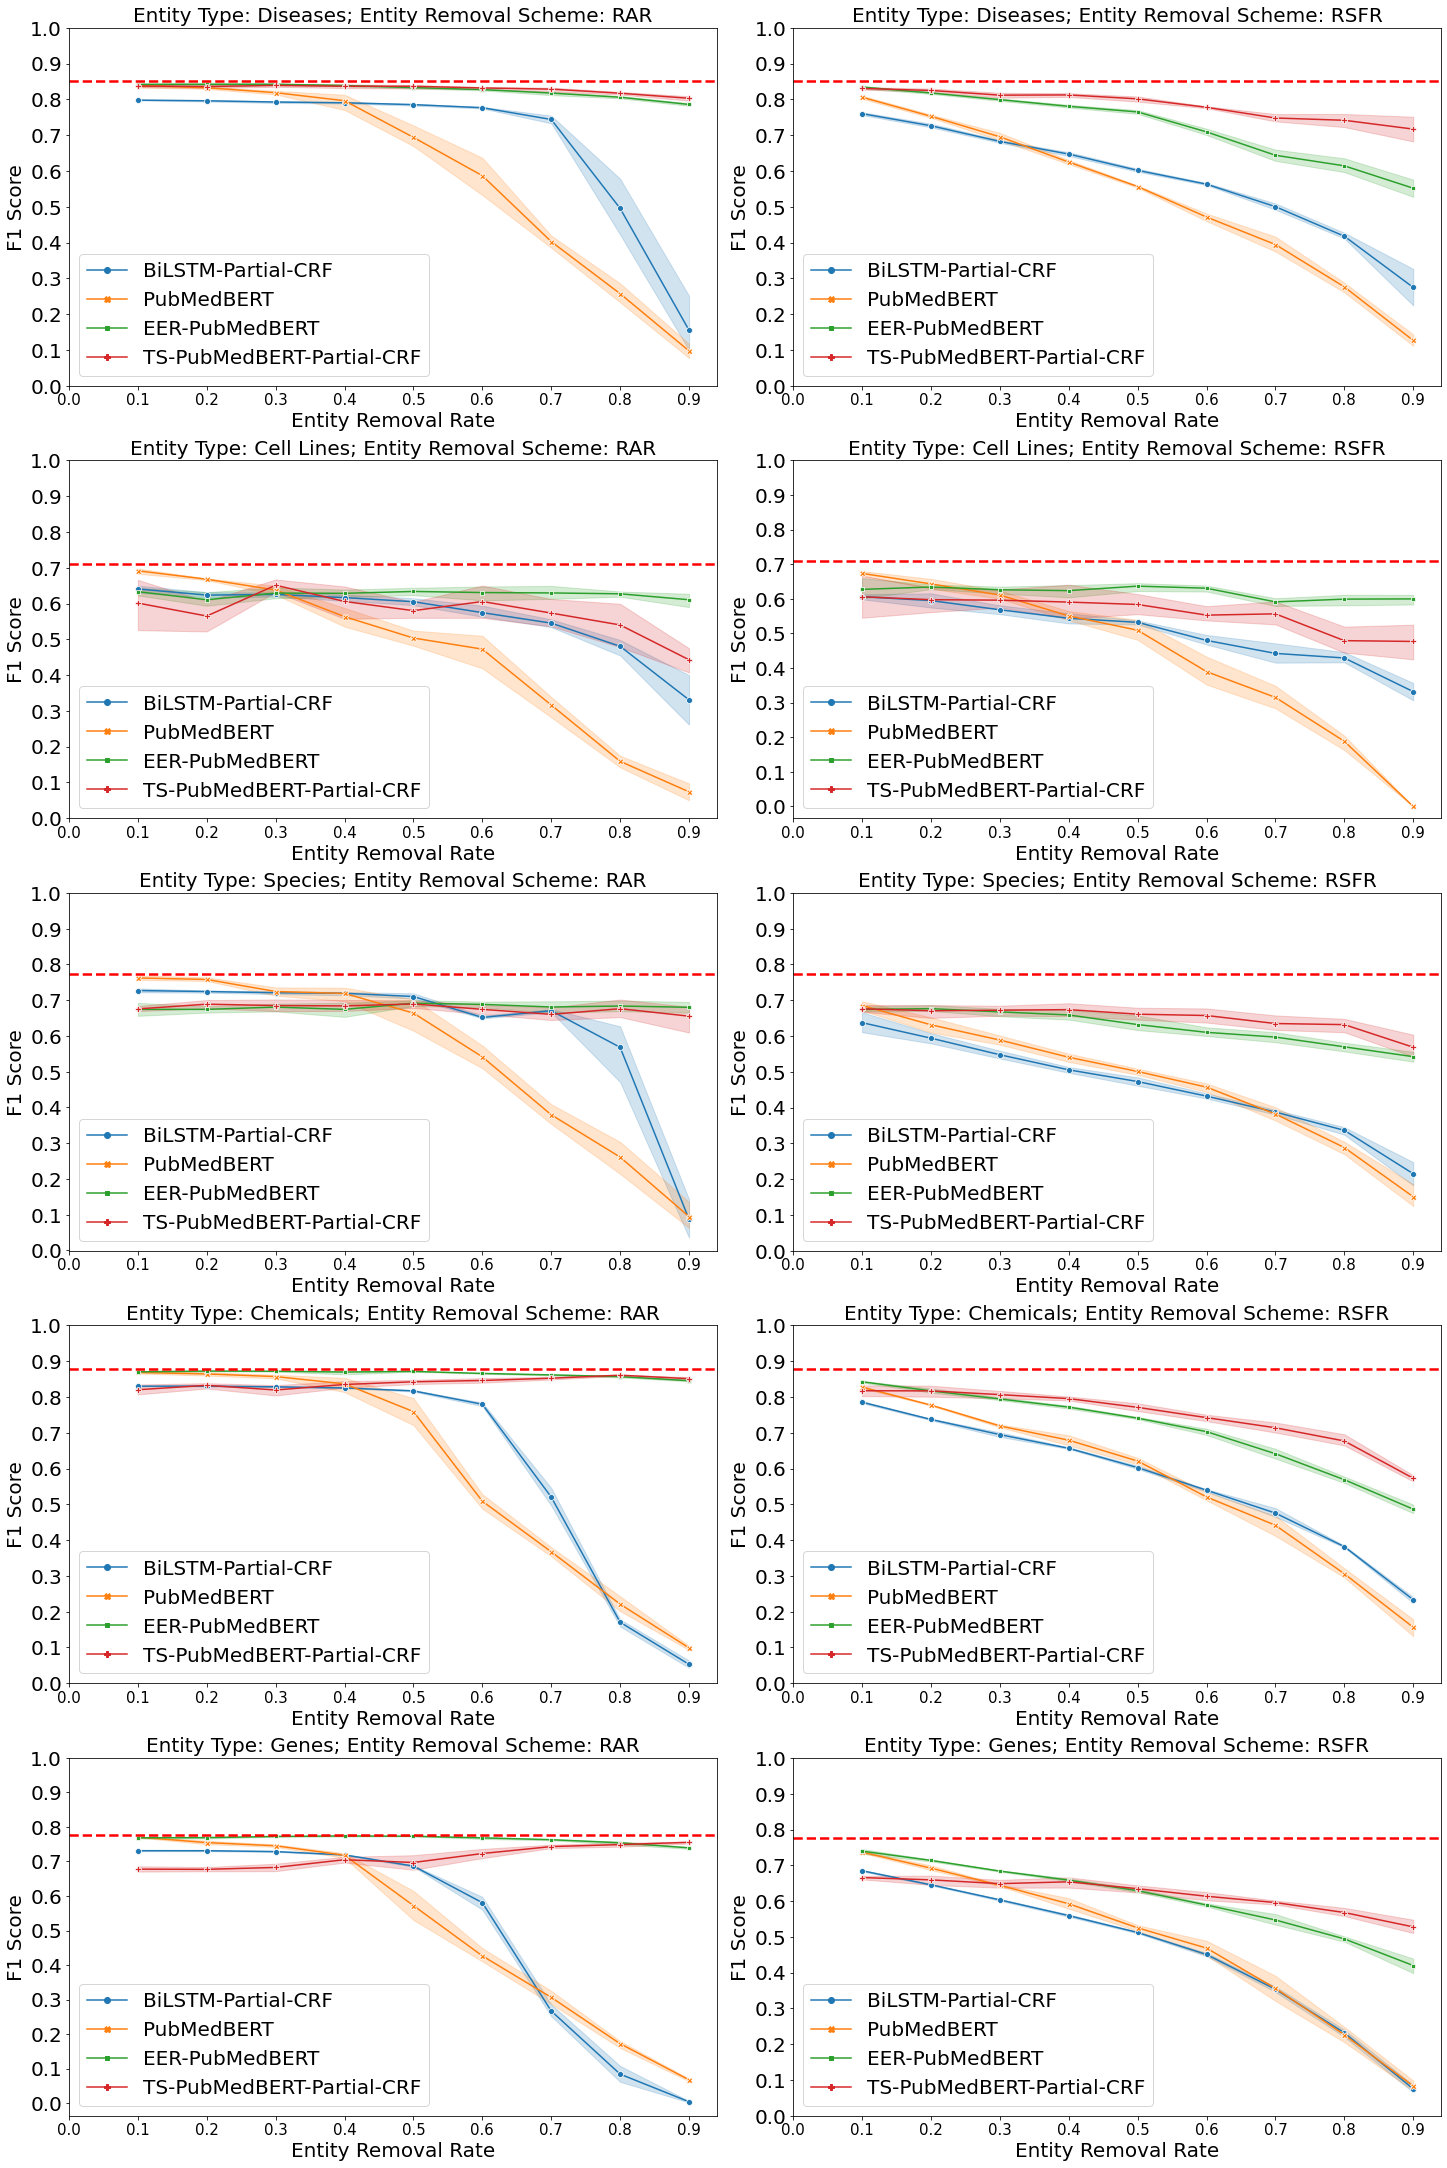

In [37]:
# 创建子图，5行2列，每一行为entity type，每列为entity removal algorithm，横着看就是固定数据集，对比两种随机去除算法，竖着看就是固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,30),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[0]
        entity_removal_algorithm=combi[1]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines)
plt.savefig(f"figures/Average_F1_combination_5_2.pdf",dpi=1000)


current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

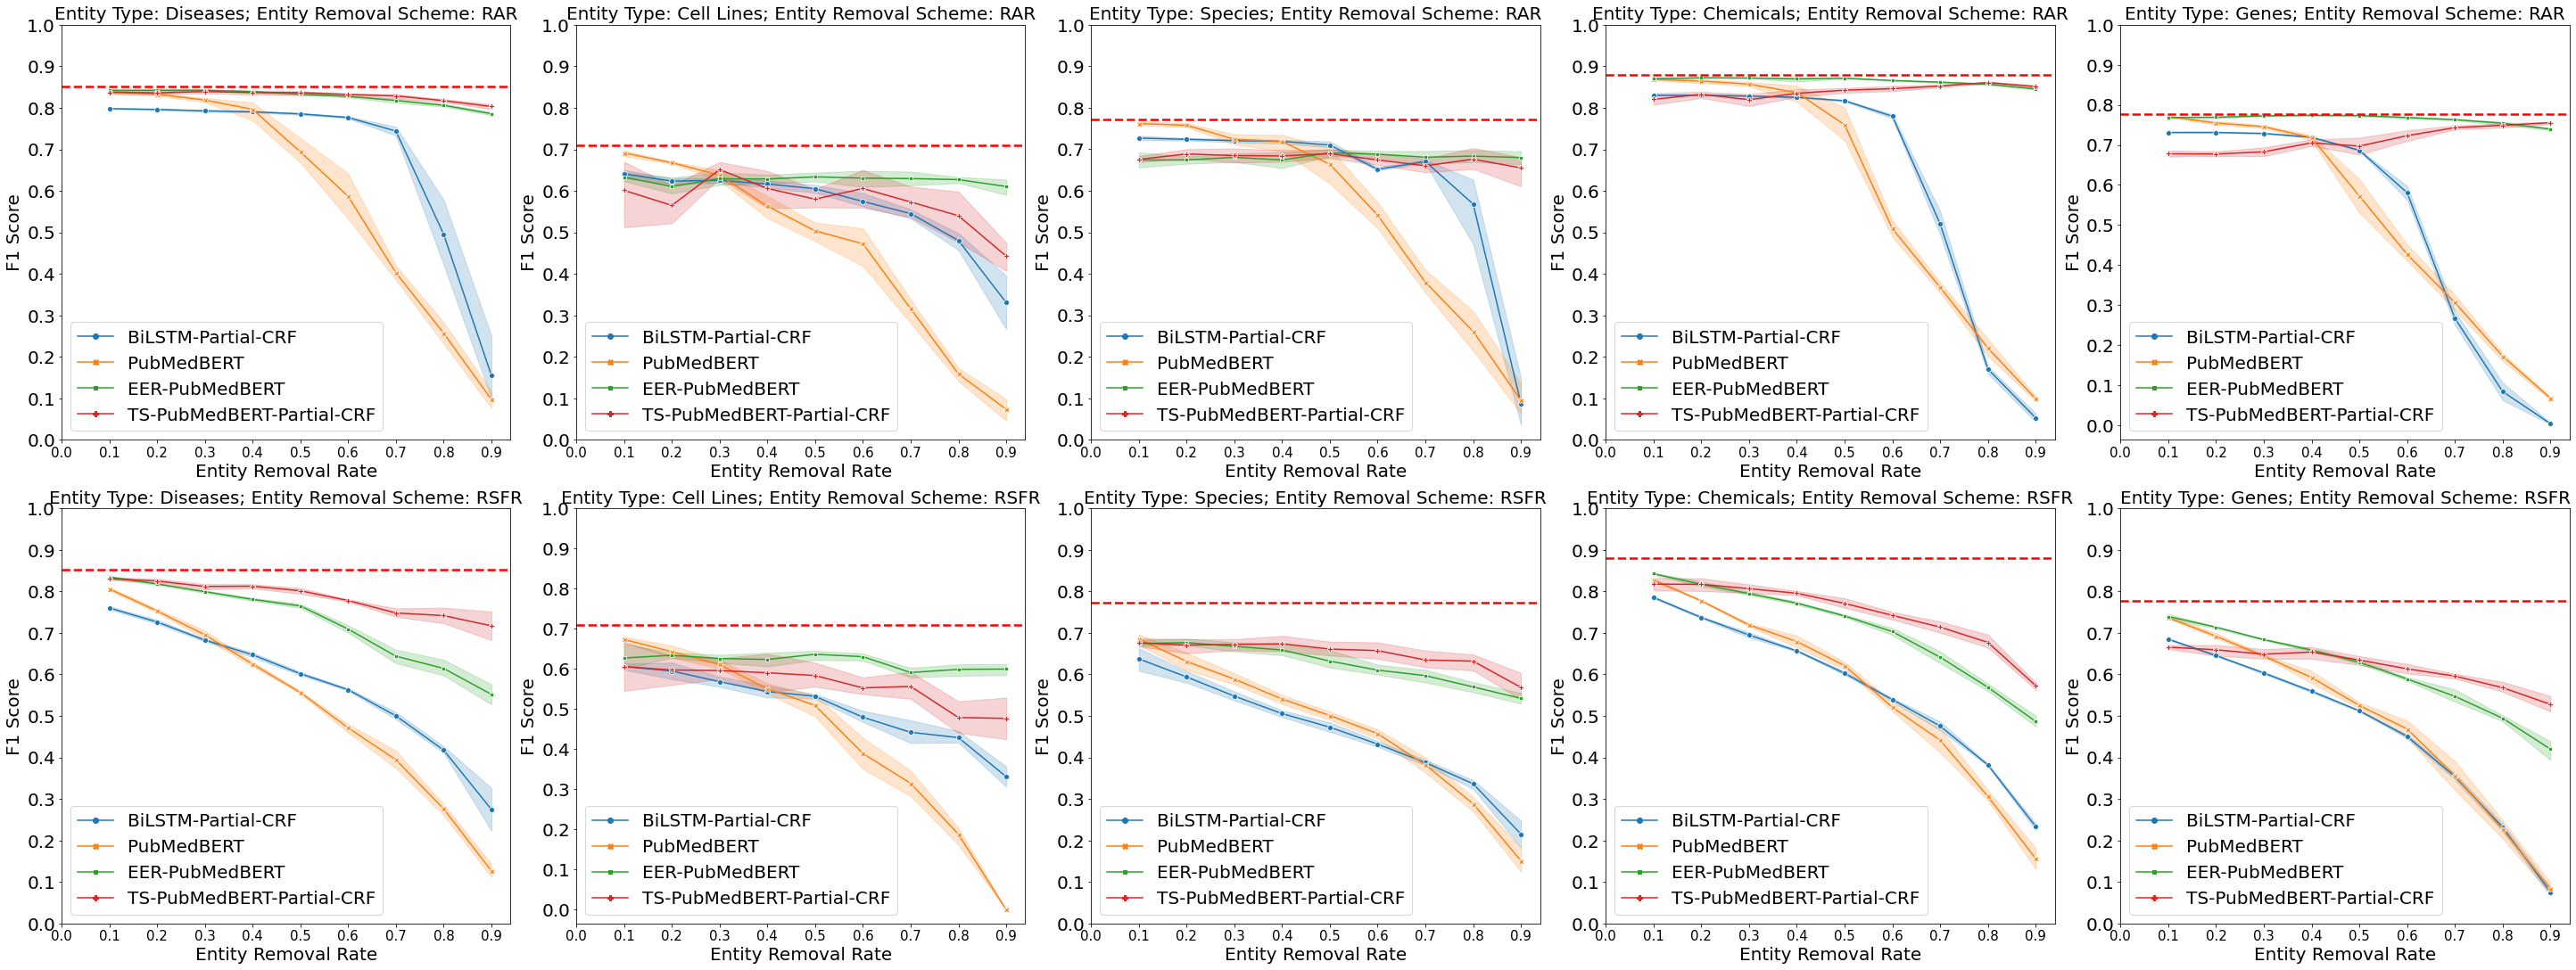

In [38]:
# 创建子图，2行5列，每一行为一个entity removal algorithm在5个entity type上的表现，固定随机去除算法，观察每个数据集的情况
fig,axs=plt.subplots(nrows=2,ncols=5,figsize=(40,15),constrained_layout=True)
category_algorithm_combination=[[entity_removal_algorithm,Entity_Category]  for entity_removal_algorithm in entity_removal_algorithm_list for Entity_Category in Entity_Category_list] # 遍历先后顺序发生改变
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[1]
        entity_removal_algorithm=combi[0]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines)
plt.savefig(f"figures/Average_F1_combination_2_5.pdf",dpi=1000)

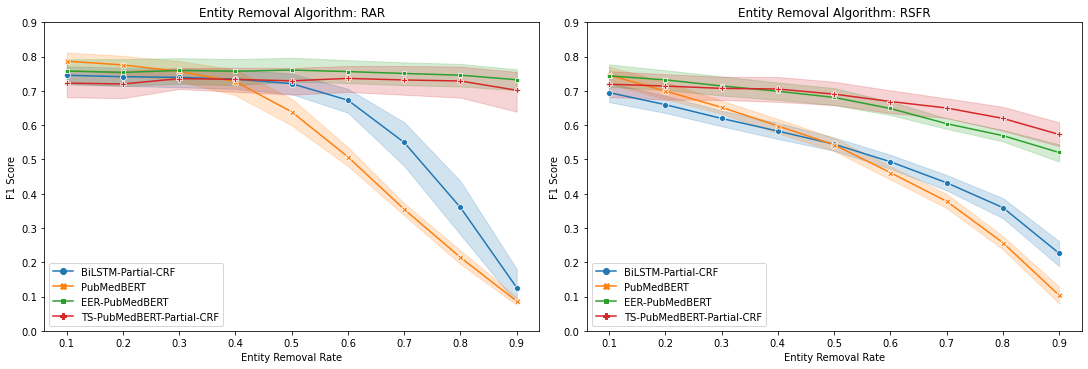

In [39]:
# 画一幅图
def plot_figure_aggragate_entity_name(entity_removal_algorithm,ax,dataframe):
    seaborn.lineplot(data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm)],style="Model",markers=True,dashes=False,x='entity_removal_rate',y='test_f1',hue='Model',err_style='band',ax=ax,hue_order=all_baselines['Model'].unique())
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]

    ax.legend(loc='lower left')
    ax.set_xlabel('Entity Removal Rate')
    ax.set_ylabel('F1 Score')
    ax.set_yticks(np.arange(0,1.0,0.1))
    ax.set_title(f'Entity Removal Algorithm: {abbr_algorithm}')
    

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),constrained_layout=True)
plot_figure_aggragate_entity_name("remove_surfaceforms_randomly",ax2,all_baselines)
plot_figure_aggragate_entity_name("remove_annotations_randomly",ax1,all_baselines)
plt.savefig(f"figures/Average_F1_removal_algorithm_subplot.pdf",dpi=1000)
plt.show()